# Assignment-1 Part B

## File loading and preprocessing

In [2]:
!wget "https://docs.google.com/spreadsheets/d/e/2PACX-1vSz4oJjs2VNIZfLZun8E0enshAbuHAZEDh-NMDJNW1UlBoEaQapV5UPs0i1N9hYVu_86RmZFGnSwBI0/pub?gid=1777438324&single=true&output=csv" -O diabetes.csv

--2023-09-04 16:58:05--  https://docs.google.com/spreadsheets/d/e/2PACX-1vSz4oJjs2VNIZfLZun8E0enshAbuHAZEDh-NMDJNW1UlBoEaQapV5UPs0i1N9hYVu_86RmZFGnSwBI0/pub?gid=1777438324&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 173.194.79.100, 173.194.79.138, 173.194.79.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.100|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-08-4o-sheets.googleusercontent.com/pub/54bogvaave6cua4cdnls17ksc4/91an32au741ud3gerrlh6um2kg/1693846685000/102023156048488453900/*/e@2PACX-1vSz4oJjs2VNIZfLZun8E0enshAbuHAZEDh-NMDJNW1UlBoEaQapV5UPs0i1N9hYVu_86RmZFGnSwBI0?gid=1777438324&single=true&output=csv [following]
--2023-09-04 16:58:06--  https://doc-08-4o-sheets.googleusercontent.com/pub/54bogvaave6cua4cdnls17ksc4/91an32au741ud3gerrlh6um2kg/1693846685000/102023156048488453900/*/e@2PACX-1vSz4oJjs2VNIZfLZun8E0enshAbuHAZEDh-NMDJNW1UlBoEaQapV5UPs0i1N9hYVu_86RmZFGnSwBI0?gid=17774383

Library import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load dataset into pandas dataframe

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Shuffle data frame

In [5]:
df = df.sample(frac=1)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
269            2      146              0              0        0  27.5   
147            2      106             64             35      119  30.5   
31             3      158             76             36      245  31.6   
49             7      105              0              0        0   0.0   
134            2       96             68             13       49  21.1   

     DiabetesPedigreeFunction  Age  Outcome  
269                     0.240   28        1  
147                     1.400   34        0  
31                      0.851   28        1  
49                      0.305   24        0  
134                     0.647   26        0

Split into required 70:20:10, train test validation split

In [6]:
# TRAIN, TEST, VAL will have number of rows for each set respectively
X, Y =  df.iloc[:, :-1].values, df.iloc[:, -1].values
# X and Y have the cummilative feature and outcome datasets of all datapoints
X = (X - X.mean())/(X.std())# Normalising X
n = X.shape[0]
n_train, n_test = int(0.7 * n), int(0.2 * n)
x_train, x_test, x_val = X[:n_train],X[n_train:n_train + n_test],X[n_train + n_test:]#splitting x
y_train, y_test, y_val = Y[:n_train],Y[n_train:n_train + n_test],Y[n_train + n_test:]#splitting y

## Function implementation for logistic regression

In [7]:
np.random.seed(1)
THETA = 0.01 * (np.random.rand(X.shape[1]) - 0.5)
B =-5
EPOCHS = 10000

#### Sigmoid activation function

In [8]:
def sigmoid(x):
  x = np.array(x)
  denom = (1+np.exp(-x))
  y = 1/denom
  return y

Verifying sigmoid activation function

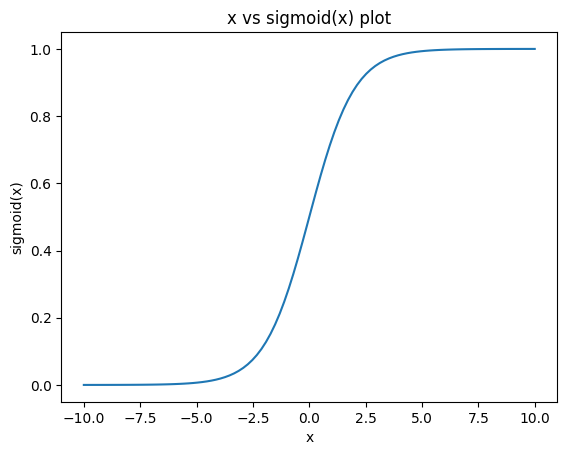

In [9]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.title("x vs sigmoid(x) plot")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()

#### Tanh activation function
  Here the tanh function is modified for binary classification. This directly modifies the loss function which calls upon the activation function.
  If not here this modification is to be directly made into the loss function where ever the tanh activation function is being called.

In [10]:
def tanh(x):
  return (np.tanh(x)+1)*0.5

Verifying tanh activation function

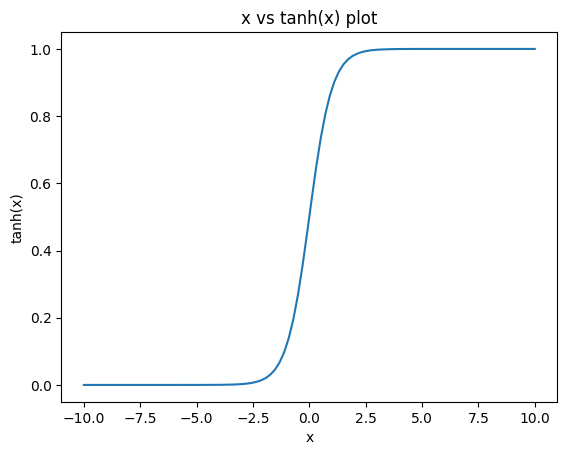

In [11]:
x = np.linspace(-10, 10, 100)
plt.plot(x, tanh(x))
plt.title("x vs tanh(x) plot")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.show()

#### Ridge and Lasso regression functions

In [12]:
def Ridge(lambda_, m = 1):
  return (lambda_/(2*m))*np.sum(np.square(theta)), (lambda_/m)*theta
def Lasso(lambda_, m = 1):
  return (lambda_/m)*np.sum(np.absolute(theta)), (lambda_/m)

#### Cost function

returns the loss and the partial derivative of loss with respect to the feature(theta) and constant(b)

In [13]:
def cost(x, y, theta, b, act_func, regular,lambda_):
  '''
  Compute the cost, gradient with respect to feature vector, and gradient with respect to bias for a given model.

  Parameters:
  x (numpy.ndarray): Input feature matrix of shape (m, n).
  y (numpy.ndarray): True labels of shape (m, 1).
  theta (numpy.ndarray): Model parameters (weights) of shape (n, 1).
  b (float): Bias term.
  act_func (function): Activation function applied to the linear combination of inputs and weights.
  regular (function): Regularization function for computing regularization terms.
  lambda_ (float): Regularization parameter.

  Returns:
  J (float): Cost (loss) of the model.
  dJ_dt (numpy.ndarray): Gradient of the cost with respect to the feature vector of shape (n, 1).
  dJ_db (float): Gradient of the cost with respect to the bias term.
  '''
  m, n = x.shape
  z  = np.dot(x,theta) + b
  h_theta = act_func(z) # applying activation function
  loss = -np.dot(np.log(h_theta).T,y)-np.dot(np.log(1-h_theta).T,(1-y))
  #cross entropy loss function
  reg_cost, reg = regular(lambda_, m) #getting regulariszation terms
  # reg_cost is to be added to the cost function
  # reg is to be added to the partial derivative of loss function wrt feature vector
  J = loss/m + reg_cost #loss
  diff = h_theta - y
  dJ_db = np.mean(diff)# partial derivative wrt b
  if(regular == Lasso):# for lasso regression
    lst = np.dot(x.T,diff)/m
    sgn = np.where(lst >= 0, 1, -1)
    dJ_dt = lst + reg*sgn #labda sign included for lasso regression
  else:
    dJ_dt = np.dot(x.T,diff)/m + reg # Rdige regression
  return J, dJ_dt, dJ_db

def loss_func(x, y, theta, b, act_func, regular,lambda_):
  m, n = x.shape
  z  = np.dot(x,theta) + b
  h_theta = act_func(z) # applying activation function
  loss = -np.dot(np.log(h_theta).T,y)-np.dot(np.log(1-h_theta).T,(1-y))
  #cross entropy loss function
  reg_cost, reg = regular(lambda_, m) #getting regulariszation terms
  # reg_cost is to be added to the cost function
  # reg is to be added to the partial derivative of loss function wrt feature vector
  J = loss/m + reg_cost #loss
  return J

#### Accuracy function
predict predicts the model outcome for datapoint
accuracy calculates and returns accuracy of the model

In [14]:
def predict(x,theta,b, act_func):
  z = np.dot(x,theta)+b
  h_theta = act_func(z)
  p = np.where(h_theta >= act_func(0), 1, 0)
  return p
def accuracy(x, y, theta,b, act_func):
  p = predict(x, theta, b, act_func)
  acr= np.mean(p == y) * 100
  return acr


#### Gradient Descent
Performs gradient descent and also stores history of loss and accuracy of the model over the iterations

In [15]:
def gradient_descent(x, y, alpha, epochs, theta, act_func, regular, b=0, lambda_=0, k = -1, r = -1):
    '''
    Perform gradient descent optimization for a given model.
    Stores loss and accuracy of every epoch

    Parameters:
    x (numpy.ndarray): Input feature matrix of shape (m, n).
    y (numpy.ndarray): True labels of shape (m, 1).
    alpha (float): Learning rate.
    epochs (int): Number of training epochs.
    theta (numpy.ndarray): Model parameters (weights) of shape (n, 1).
    act_func (function): Activation function applied to the linear combination of inputs and weights.
    regular (function): Regularization function for computing regularization terms.
    b (float, optional): Bias term. Default is 0.
    lambda_ (float, optional): Regularization parameter. Default is 0.

    Returns:
    theta (numpy.ndarray): Updated model parameters (weights).
    b (float): Updated bias term.
    trn_hst (list): Training accuracy history at each epoch.
    tst_hst (list): Testing accuracy history at each epoch.
    val_hst (list): Validation accuracy history at each epoch.
    J_hst (list): Loss history at each epoch.
    '''
    m, n = x.shape
    if(k == -1):
      # by default sgd takes entire train dataset
      k = m
    if(r == -1):
      # by default only 1 batch of m
      r = 1
    trn_hst, tst_hst, val_hst, J_trn_hst, J_tst_hst, J_val_hst = [],[],[],[],[],[]
    for i in range(epochs):
        #choose k random indices from m without replacement
        indices = np.random.choice(m, k, replace=False)

        #Stochastic gradient, random subset of m datapoints in test set
        x_mod = x[indices]
        y_mod = y[indices]

        #for mini batch, splitting the random subset into r equal batches
        x_batches = np.split(x_mod, r)
        y_batches = np.split(y_mod, r)

        # running gradient descent for each batch
        for batch in range(r):
          x_set, y_set = x_batches[batch], y_batches[batch]
          J, dJ_dt, dJ_db = cost(x_set, y_set, theta, b, act_func, regular, lambda_)
          #update theta and b
          theta = theta - alpha * dJ_dt
          b = b - alpha * dJ_db

        # Calculate and record training accuracy
        trn_hst.append(accuracy(x_train, y_train, theta, b, act_func))

        # Calculate and record testing accuracy
        tst_hst.append(accuracy(x_test, y_test, theta, b, act_func))

        # Calculate and record validation accuracy
        val_hst.append(accuracy(x_val, y_val, theta, b, act_func))

        # Record the loss
        J_trn_hst.append(J)
        # test loss purely for comparison
        J_t = loss_func(x_test, y_test, theta, b, act_func, regular, lambda_)
        J_tst_hst.append(J_t)

        # val loss purely for comparison
        J_v = loss_func(x_val, y_val, theta, b, act_func, regular, lambda_)
        J_val_hst.append(J_v)
    return theta, b, trn_hst, tst_hst, val_hst, J_trn_hst, J_tst_hst, J_val_hst

### Confusion matrix for part c

In [16]:
def plot_confusion(conf_matrix, percent, cmap):
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('Binary Confusion Matrix')
    plt.colorbar()
    classes = ['Negative', 'Positive']
    if percent:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum()
    thresh = conf_matrix.max() / 2.0
    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(conf_matrix[i, j], '.2f' if percent else 'd'),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.xticks([0, 1], classes)
    plt.yticks([0, 1], classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def confusion_matrix(y_true, y_pred, percent = True, colour = plt.cm.RdPu):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    plot_confusion(np.array([[tn, fp],[fn, tp]]), percent, colour)

    accuracy = round((tp + tn) / (tp + tn + fp + fn), 2)
    precision = round(tp / (tp + fp) if (tp + fp) > 0 else 0, 2)
    recall = round(tp / (tp + fn) if (tp + fn) > 0 else 0, 2)
    f1 = round(2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0, 2)

    print(f"       Accuracy: {accuracy}")
    print(f"      Precision: {precision}")
    print(f"         Recall: {recall}")
    print(f"       F1 score: {f1}")

## (a) Logsitic Regression on given dataset

In [17]:
test_cases, features = X.shape
epochs = EPOCHS
alpha = 0.1
theta = THETA
b = B
act_func = sigmoid
lambda_ = 0
regu = Ridge
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

#### loss vs Iteration plot

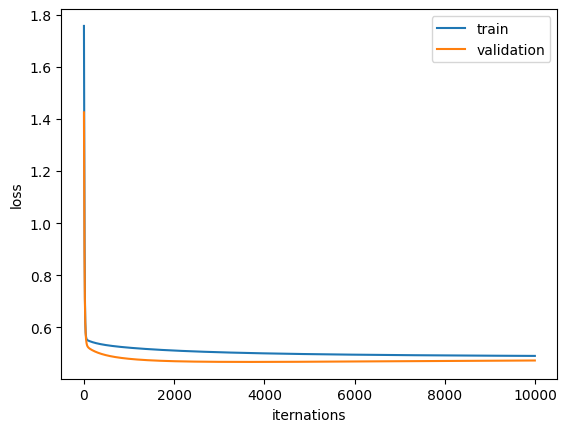

In [18]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

#### Train and Validation accuracy vs Iteration plot

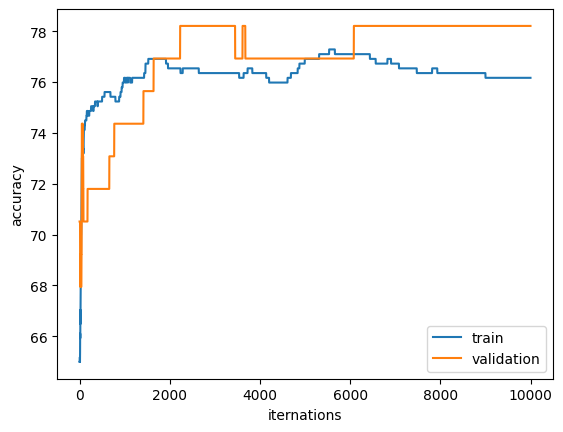

Train Accuracy: 76.16387337057728
Validation Accuracy: 78.2051282051282


In [19]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

#### Test loss vs Iteration plot

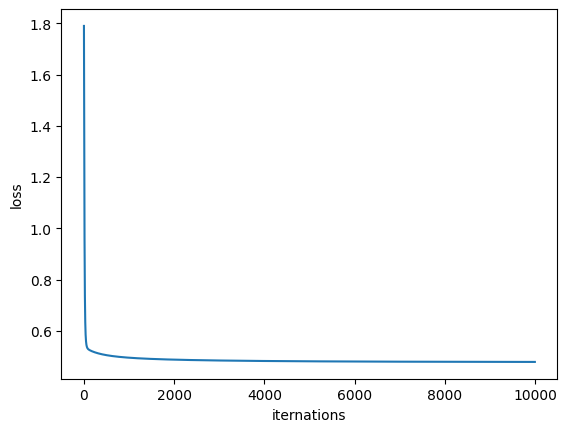

In [20]:
plt.plot(itr, J_tst)
plt.xlabel("iternations")
plt.ylabel("loss")
plt.show()

#### Test accuracy vs Iteration plot

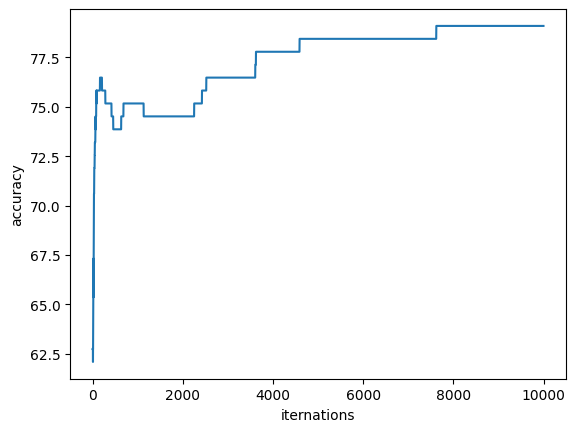

Test Accuracy:79.08496732026144


In [21]:
plt.plot(itr, tst)
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.show()
print(f'Test Accuracy:{tst[-1]}')

## (b) Changing learning Rates

In [22]:
test_cases, features = X.shape
act_func = sigmoid
lambda_ = 0
regu = Ridge
epochs = EPOCHS

#### Learning rate = 1

In [23]:
theta = THETA
b = B
alpha = 1
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

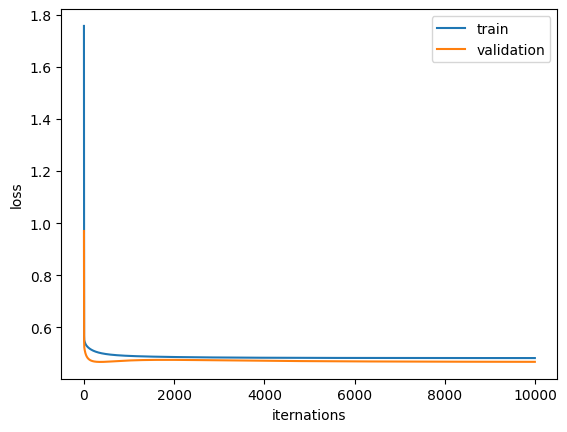

In [24]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

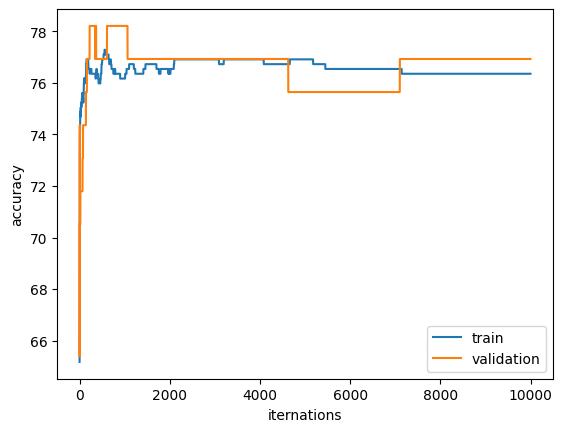

Train Accuracy: 76.35009310986965
Validation Accuracy: 76.92307692307693


In [25]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

In [26]:
print(f'Test Accuracy:{tst[-1]}')

Test Accuracy:78.43137254901961


##### (c) confusion matrix

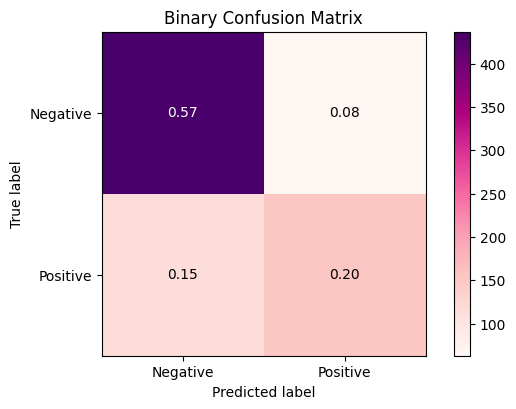

       Accuracy: 0.77
      Precision: 0.71
         Recall: 0.57
       F1 score: 0.63


In [27]:
confusion_matrix(Y, predict(X, theta, b, act_func))

#### Learning rate = 0.1

In [28]:
theta = THETA
b = B
alpha = 0.1
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

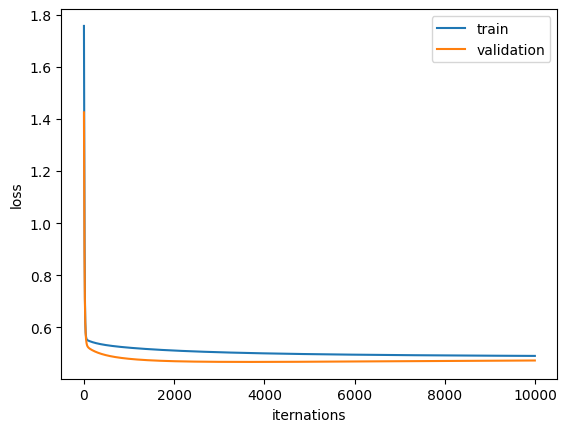

In [29]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

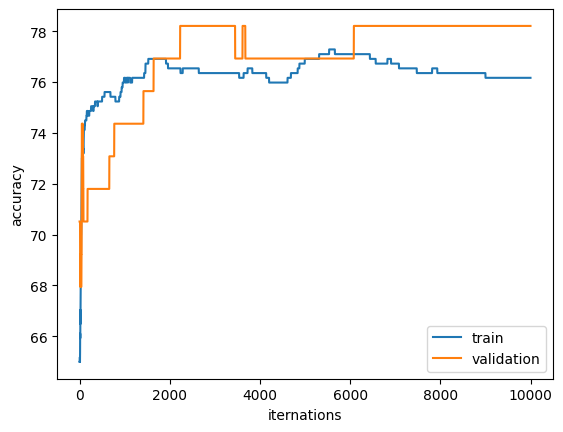

Train Accuracy: 76.16387337057728
Validation Accuracy: 78.2051282051282


In [30]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

In [31]:
print(f'Test Accuracy:{tst[-1]}')

Test Accuracy:79.08496732026144


##### (c) confusion matrix

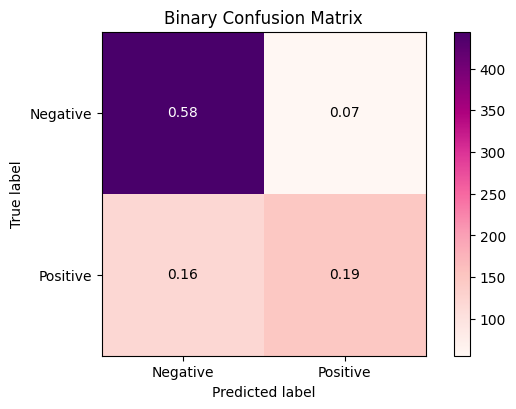

       Accuracy: 0.77
      Precision: 0.72
         Recall: 0.55
       F1 score: 0.62


In [32]:
confusion_matrix(Y, predict(X, theta, b, act_func))

#### Learning rate = 0.01

In [33]:
theta = THETA
b = B
alpha = 0.01
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

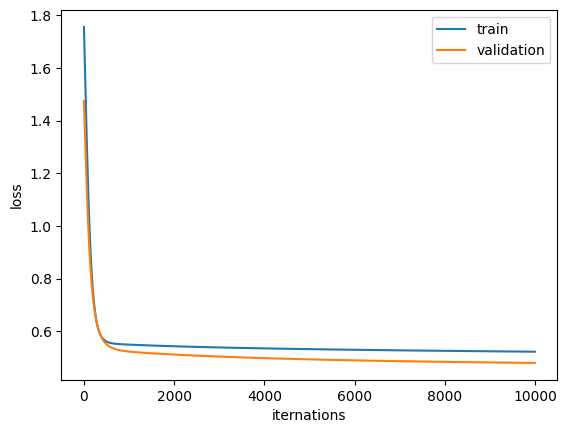

In [34]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

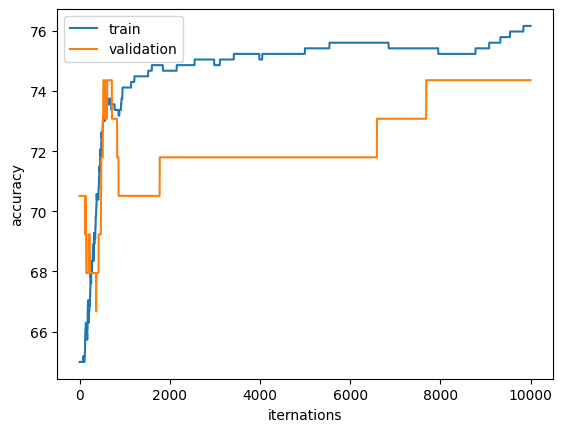

Train Accuracy: 76.16387337057728
Validation Accuracy: 74.35897435897436


In [35]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

In [36]:
print(f'Test Accuracy:{tst[-1]}')

Test Accuracy:75.16339869281046


##### (c) confusion matrix

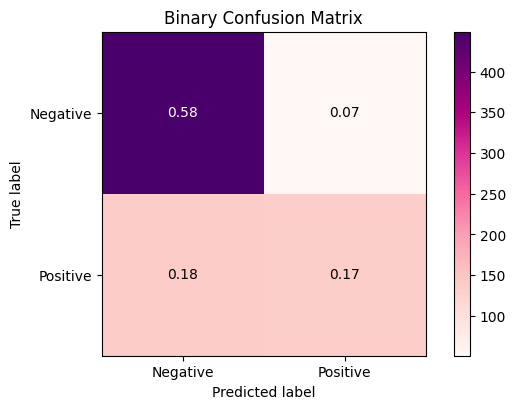

       Accuracy: 0.76
      Precision: 0.72
         Recall: 0.5
       F1 score: 0.59


In [37]:
confusion_matrix(Y, predict(X, theta, b, act_func))

#### Learning rate = 0.001

In [38]:
theta = THETA
b = B
alpha = 0.001
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

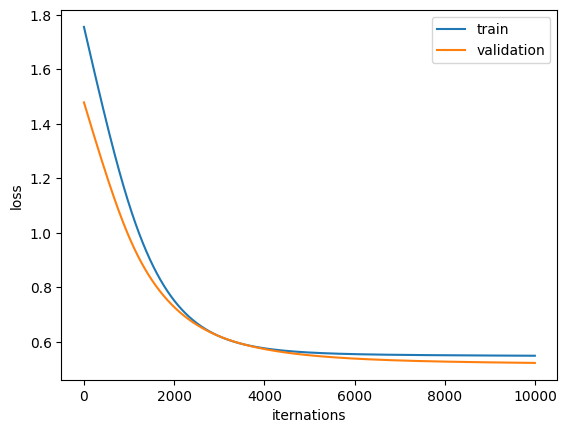

In [39]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

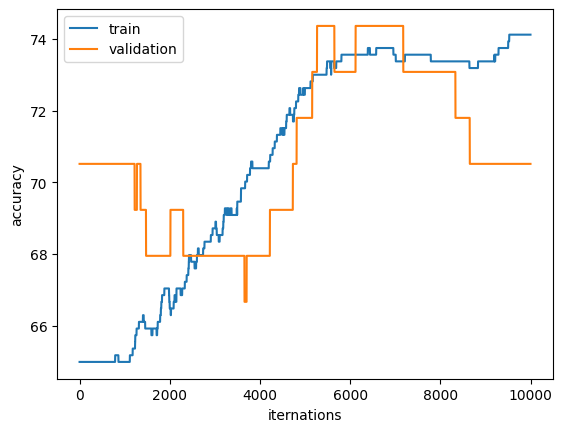

Train Accuracy: 74.11545623836126
Validation Accuracy: 70.51282051282051


In [40]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

In [41]:
print(f'Test Accuracy:{tst[-1]}')

Test Accuracy:75.81699346405229


##### (c) confusion matrix

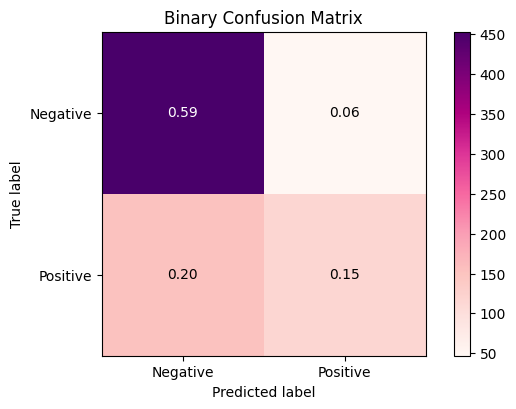

       Accuracy: 0.74
      Precision: 0.71
         Recall: 0.43
       F1 score: 0.54


In [42]:
confusion_matrix(Y, predict(X, theta, b, act_func))

## (d) Regularisation Parameter Optimisation

In [43]:
test_cases, features = X.shape
epochs = EPOCHS
alpha = 1
act_func = sigmoid

### Without Regularisation

In [44]:
regu = Ridge
theta = THETA
b = B
lambda_ = 0
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

#### loss vs Iteration plot

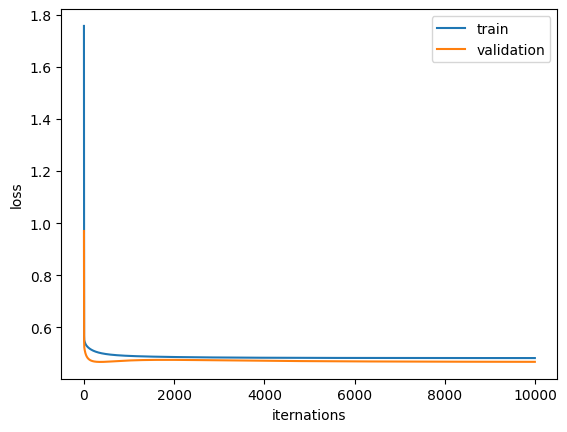

In [45]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

#### Train and Validation accuracy vs Iteration plot

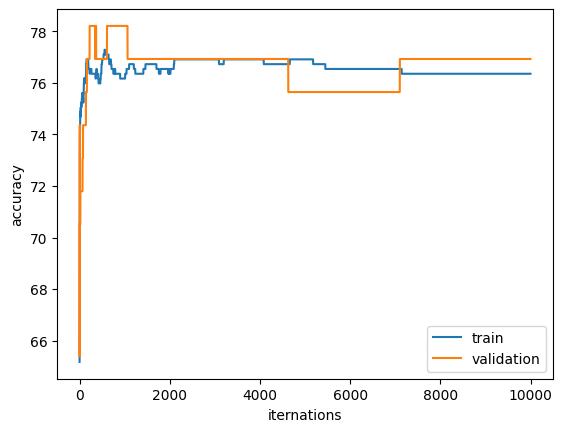

Train Accuracy: 76.35009310986965
Validation Accuracy: 76.92307692307693


In [46]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

#### Test loss vs Iteration plot

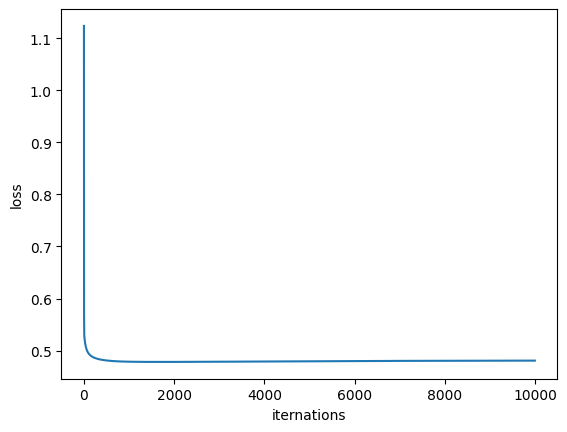

In [47]:
plt.plot(itr, J_tst)
plt.xlabel("iternations")
plt.ylabel("loss")
plt.show()

#### Test accuracy vs Iteration plot

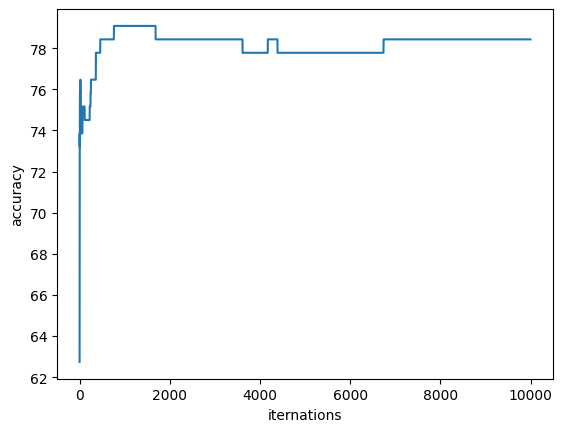

Test Accuracy:78.43137254901961


In [48]:
plt.plot(itr, tst)
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.show()
print(f'Test Accuracy:{tst[-1]}')

### Ridge

In [49]:
regu = Ridge
theta = THETA
b = B
lambda_ = 100
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

#### loss vs Iteration plot

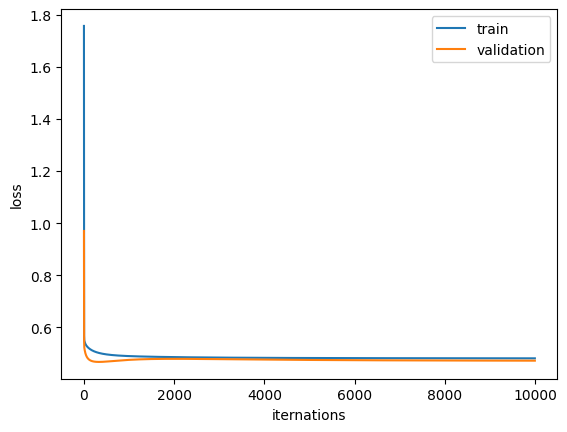

In [50]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

#### Train and Validation accuracy vs Iteration plot

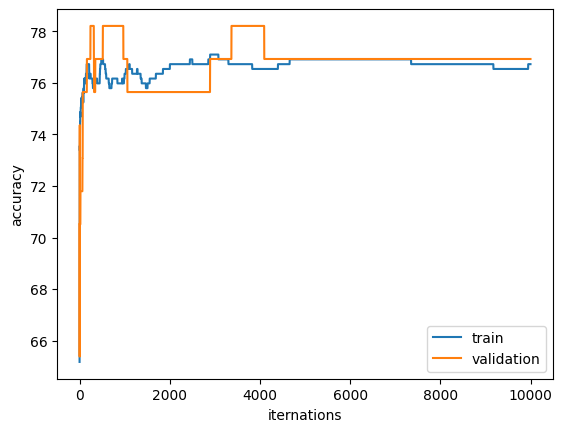

Train Accuracy: 76.72253258845437
Validation Accuracy: 76.92307692307693


In [51]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

#### Test loss vs Iteration plot

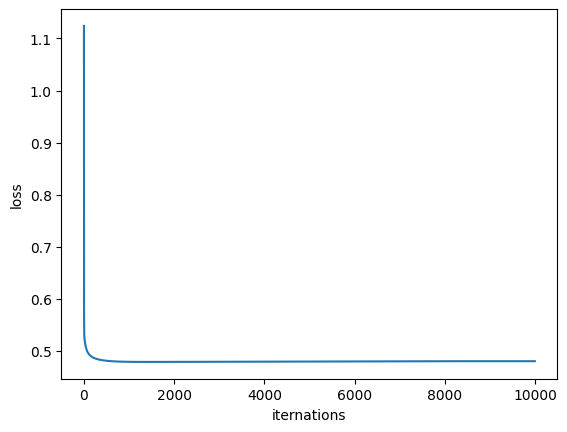

In [52]:
plt.plot(itr, J_tst)
plt.xlabel("iternations")
plt.ylabel("loss")
plt.show()

#### Test accuracy vs Iteration plot

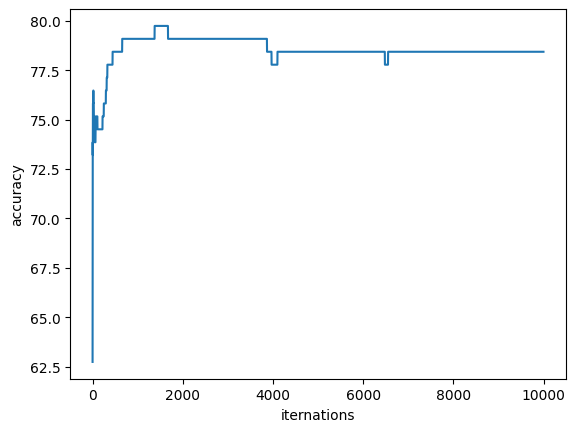

Test Accuracy:78.43137254901961


In [53]:
plt.plot(itr, tst)
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.show()
print(f'Test Accuracy:{tst[-1]}')

### Lasso

In [54]:
theta = THETA
b = B
regu = Lasso
lambda_ = 1
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

#### loss vs Iteration plot

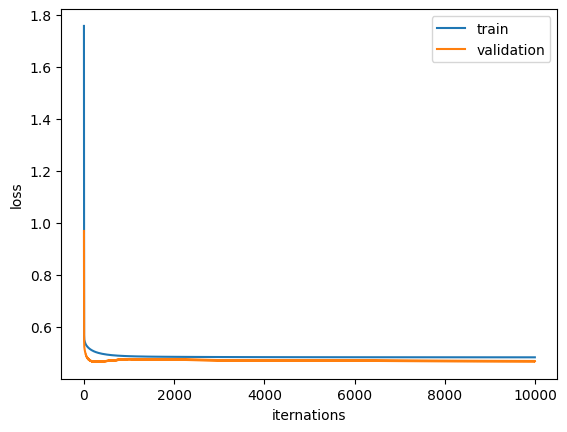

In [55]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

#### Train and Validation accuracy vs Iteration plot

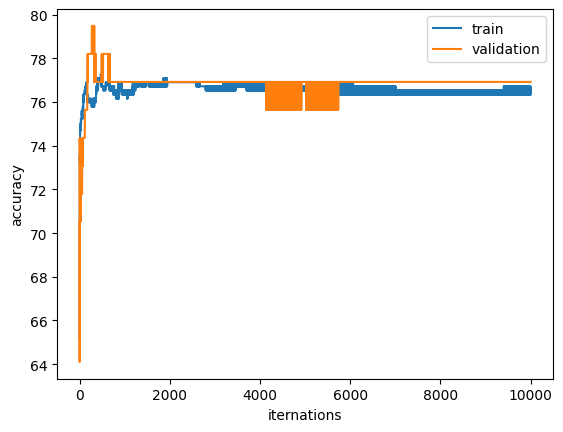

Train Accuracy: 76.35009310986965
Validation Accuracy: 76.92307692307693


In [56]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

#### Test loss vs Iteration plot

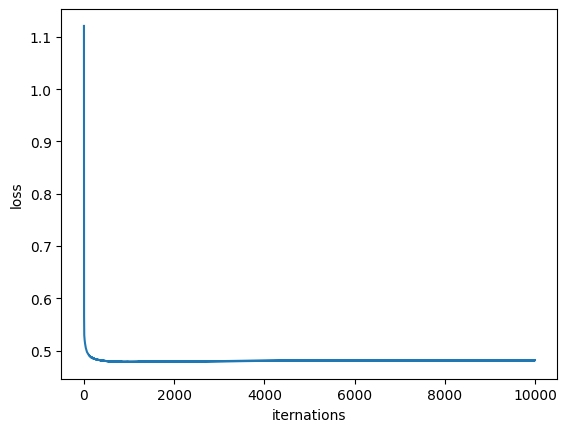

In [57]:
plt.plot(itr, J_tst)
plt.xlabel("iternations")
plt.ylabel("loss")
plt.show()

#### Test accuracy vs Iteration plot

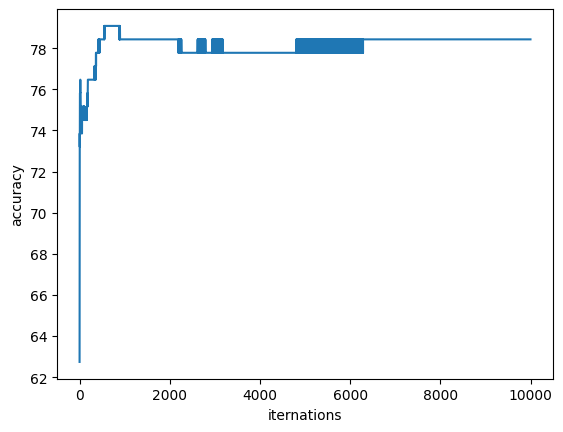

Test Accuracy:78.43137254901961


In [58]:
plt.plot(itr, tst)
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.show()
print(f'Test Accuracy:{tst[-1]}')

## (e) using Tanh activation

In [59]:
epochs = EPOCHS
alpha = 0.01
theta = THETA
b = B
act_func = tanh
lambda_ = 0
regu = Ridge
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_)
itr = [i for i in range(epochs)]

#### loss vs Iteration plot

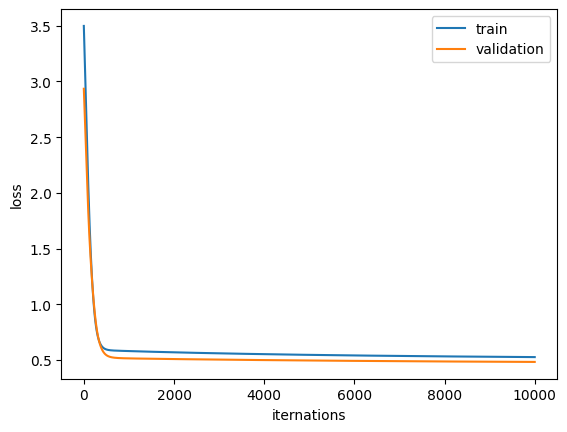

In [60]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

#### Train and Validation accuracy vs Iteration plot

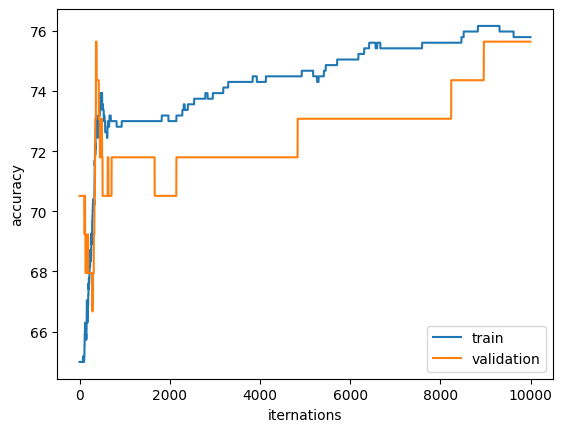

Train Accuracy: 75.79143389199255
Validation Accuracy: 75.64102564102564


In [61]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

#### Test loss vs Iteration plot

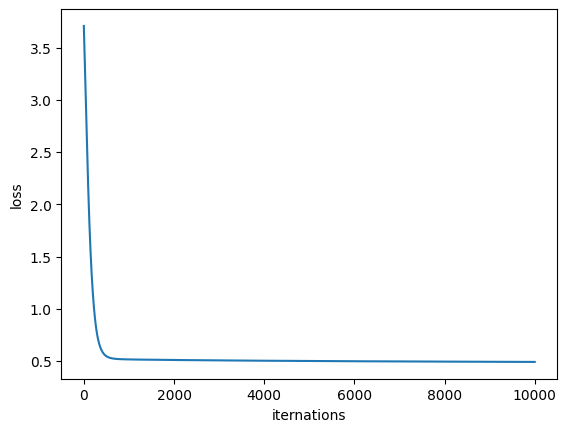

In [62]:
plt.plot(itr, J_tst)
plt.xlabel("iternations")
plt.ylabel("loss")
plt.show()

#### Test accuracy vs Iteration plot

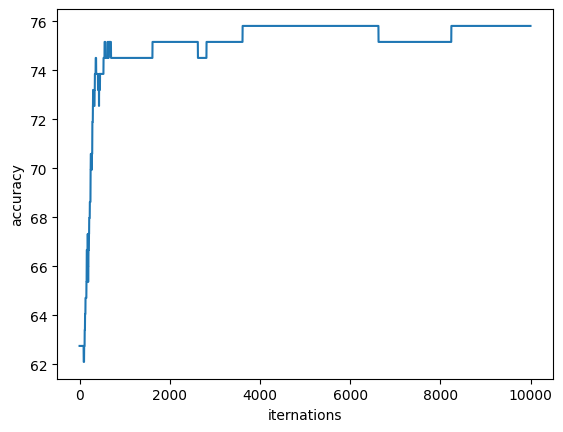

Test Accuracy:75.81699346405229


In [63]:
plt.plot(itr, tst)
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.show()
print(f'Test Accuracy:{tst[-1]}')

## (f) Mini Batch Calculation

In [64]:
test_cases, features = X.shape
epochs = EPOCHS
alpha = 0.01
theta = THETA
b = B
act_func = sigmoid
lambda_ = 0
regu = Ridge
theta, b, trn, tst, val, J, J_tst, J_val = gradient_descent(x_train, y_train, alpha, epochs,theta, act_func, regu, b,lambda_,r = 3)
itr = [i for i in range(epochs)]

#### loss vs Iteration plot

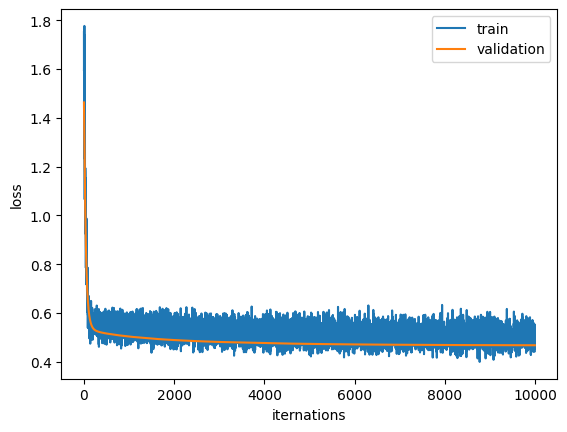

In [65]:
plt.plot(itr, J, label= "train")
plt.plot(itr, J_val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("loss")
plt.legend()
plt.show()

#### Train and Validation accuracy vs Iteration plot

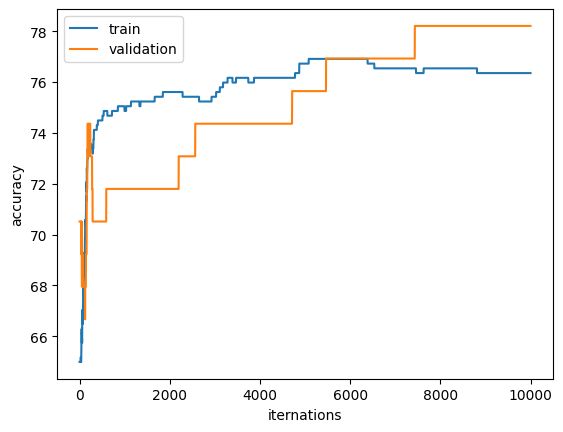

Train Accuracy: 76.35009310986965
Validation Accuracy: 78.2051282051282


In [66]:
plt.plot(itr, trn, label= "train")
plt.plot(itr, val, label= "validation")
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print(f'Train Accuracy: {trn[-1]}')
print(f'Validation Accuracy: {val[-1]}')

#### Test loss vs Iteration plot

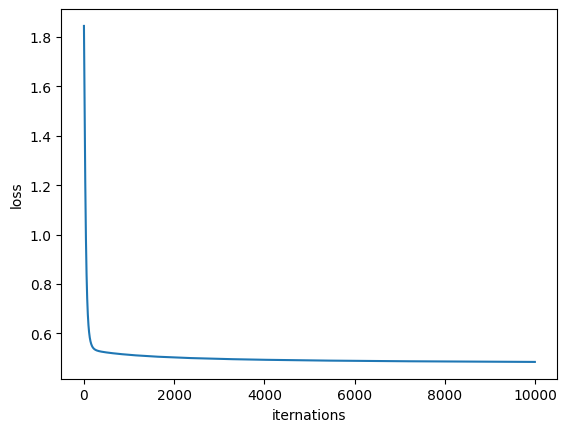

In [67]:
plt.plot(itr, J_tst)
plt.xlabel("iternations")
plt.ylabel("loss")
plt.show()

#### Test accuracy vs Iteration plot

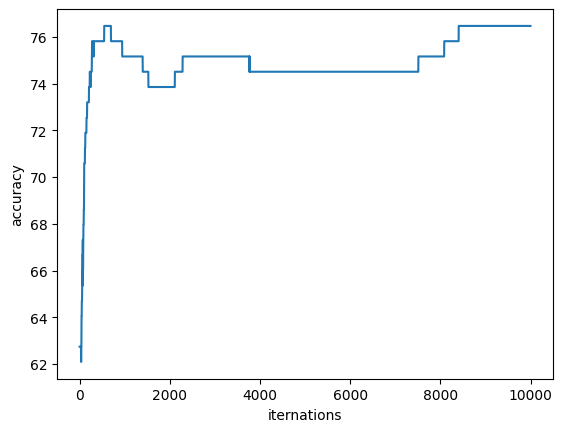

Test Accuracy:76.47058823529412


In [68]:
plt.plot(itr, tst)
plt.xlabel("iternations")
plt.ylabel("accuracy")
plt.show()
print(f'Test Accuracy:{tst[-1]}')